In [1]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 38 kB/s 
     |████████████████████████████████| 198 kB 48.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=030c610b5b31cb76f9d2fbd531f6d386c52e38e9c8cf71bccde54f7e70c00d14
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [2]:
from datetime import datetime, date
import datetime as dt
import time
from pyspark.sql import DataFrame
import pandas as pd
from pyspark.sql import Row
from pyspark.sql import functions as F
from pyspark.sql.functions import current_timestamp, from_unixtime
import random
import string
import numpy as np
import itertools
import scipy.stats

In [3]:
all_names = ["Valera", "Volodya", "Masha", "Eva" , "Vsevolod", "Efrosinia" , "James",
             "Mary", "Robert", "Patricia", "John", "Jennifer", "Michael", "Linda",
             "William", "Elizabeth", "David", "Barbara", "Richard", "Susan", "Joseph",
             "Jessica", "Thomas", "Sarah", "Charles", "Karen", "Christopher", "Nancy",
             "Daniel", "Lisa", "Matthew", "Betty", "Anthony", "Margaret", "Mark",
             "Sandra", "Donald", "Ashley", "Steven", "Kimberly", "Paul", "Emily",
             "Andrew", "Donna", "Joshua", "Michelle", "Kenneth", "Dorothy", "Kevin",
             "Carol", "Brian", "Amanda", "George", "Melissa", "Edward", "Deborah",
             "Ronald", "Stephanie", "Timothy", "Rebecca", "Jason", "Sharon", "Jeffrey",
             "Laura", "Ryan", "Cynthia", "Jacob", "Kathleen", "Gary", "Amy", "Nicholas",
             "Shirley", "Eric", "Angela", "Jonathan", "Helen", "Stephen", "Anna", "Larry",
             "Brenda", "Justin", "Pamela", "Scott", "Nicole", "Brandon", "Emma", "Benjamin",
             "Samantha", "Samuel", "Katherine", "Gregory", "Christine", "Frank", "Debra",
             "Alexander", "Rachel", "Raymond", "Catherine", "Patrick", "Carolyn", "Jack",
             "Janet", "Dennis", "Ruth", "Jerry", "Maria", "Tyler", "Heather", "Aaron", "Diane",
             "Jose", "Virginia", "Adam", "Julie", "Henry", "Joyce", "Nathan", "Victoria", "Douglas", "Olivia", "Zachary",
             "Kelly", "Peter", "Christina", "Kyle", "Lauren", "Walter", "Joan", "Ethan", "Evelyn", "Jeremy", "Judith", "Harold",
             "Megan", "Keith", "Cheryl", "Christian", "Andrea", "Roger", "Hannah", "Noah", "Martha", "Gerald", "Jacqueline",
             "Carl", "Frances", "Terry", "Gloria"]

all_surnames = ['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'Moran',
       'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell',
       'Saundercock', 'Andersson', 'Vestrom', 'Hewlett', 'Rice',
       'Williams', 'Vander Planke', 'Masselmani', 'Fynney', 'Beesley',
       'McGowan', 'Sloper', 'Asplund', 'Fortune', 'ODwyer',
       'Todoroff', 'Uruchurtu', 'Spencer', 'Glynn', 'Wheadon', 'Meyer',
       'Holverson', 'Mamee', 'Cann', 'Yarred', 'Ahlin', 'Turpin',
       'Kraeff', 'Laroche', 'Devaney', 'Rogers', 'Lennon', 'ODriscoll',
       'Samaan', 'Franchi', 'Panula', 'Nosworthy', 'Harper',
       'Faunthorpe', 'Ostby', 'Woolner', 'Rugg', 'Novel', 'West',
       'Goodwin', 'Sirayanian', 'Icard', 'Harris', 'Skoog', 'Stewart',
       'Moubarek', 'Nye', 'Crease', 'Kink', 'Jenkin', 'Hood',
       'Chronopoulos', 'Schevchenko', 'Morozov', 'Abihashvili']



In [5]:
N_USERS = 6000
N_DRIVERS = 3000

In [6]:
def timestamp_now():
    return round(datetime.utcnow().timestamp() * 1000)

In [7]:
from pyspark.sql import SparkSession
#import org.apache.spark.sql.SparkSession;
spark = SparkSession \
            .builder \
            .getOrCreate()

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
def generate_users(n_users = 100):
    ids = np.arange(n_users)+10000
    names = np.random.choice(all_names, n_users)
    surnames = np.random.choice(all_surnames, n_users)
    user_pdf = pd.DataFrame({"Id":ids, "Name":names, "Surname":surnames})
    
    return spark.createDataFrame(user_pdf, schema='Id bigint, Name string, Surname string')

users_dataframe = generate_users(N_USERS)


In [10]:
users_dataframe.write.parquet('/content/drive/My Drive/sparklab/spark/users.parquet')

In [11]:
users_dataframe.show()

+-----+----------+-----------+
|   Id|      Name|    Surname|
+-----+----------+-----------+
|10000|     Joyce|    McGowan|
|10001|    Pamela|     Braund|
|10002|    Steven|     Braund|
|10003|Jacqueline|      Glynn|
|10004|      Mary|   Futrelle|
|10005|  Nicholas|    Cumings|
|10006|     Peter|Abihashvili|
|10007|   Anthony|     Jenkin|
|10008|      Noah|    Morozov|
|10009|    Pamela|    Woolner|
|10010|  Benjamin|     Braund|
|10011|  Kathleen|   Williams|
|10012|     Sarah|       Hood|
|10013|     Helen|    Goodwin|
|10014|   Volodya|   Williams|
|10015|    Ashley|    Beesley|
|10016|   Dorothy|        Nye|
|10017|   Brandon|      Novel|
|10018|   Jessica|      Novel|
|10019|    Rachel|    Goodwin|
+-----+----------+-----------+
only showing top 20 rows



In [12]:
def generate_drivers(n_drivers = 100):
    ids = np.arange(n_drivers)+1000
    names = np.random.choice(all_names, n_drivers)
    surnames = np.random.choice(all_surnames, n_drivers)
    car = np.random.choice(np.arange(1000, 10000), n_drivers)

    drivers_pdf = pd.DataFrame({"Id":ids, "Name":names, "Surname":surnames, "Car": car})
    
    return spark.createDataFrame(drivers_pdf, schema='Id bigint, Name string, Surname string,  Car string')

drivers_dataframe = generate_drivers(N_DRIVERS)


In [13]:
drivers_dataframe.write.parquet('/content/drive/My Drive/sparklab/spark/drivers.parquet')

In [14]:
drivers_dataframe.show()

+----+---------+------------+----+
|  Id|     Name|     Surname| Car|
+----+---------+------------+----+
|1000|    Julie|      Jenkin|2525|
|1001|   Daniel|     Franchi|6404|
|1002|   Sharon|   Holverson|8931|
|1003|Stephanie|       Meyer|4185|
|1004|   Martha|        West|6684|
|1005| Michelle|   Holverson|6677|
|1006|    Nancy|    Williams|4303|
|1007|   Dennis|   Heikkinen|9793|
|1008|    Laura|     Bonnell|2757|
|1009|   Sharon|     Morozov|7536|
|1010| Nicholas|      Crease|7274|
|1011|    Terry|      Fynney|5483|
|1012|    Ethan|Chronopoulos|6027|
|1013|     Joan|      ODwyer|2809|
|1014|   Brenda|     Palsson|5112|
|1015|   Martha|      Harris|4151|
|1016|    Terry|     Spencer|7721|
|1017|   Nathan|   Heikkinen|3156|
|1018|     Carl|      Turpin|2746|
|1019|     Jose|    Todoroff|6464|
+----+---------+------------+----+
only showing top 20 rows



In [15]:
london_address = spark.read.csv('/content/drive/My Drive/sparklab/spark/London postcodes.csv', header=True)

In [17]:
price_coef_func = lambda mult, x: mult*np.piecewise(x,  [np.logical_and(x>=0, x<=6), #night 
                          
                          np.logical_or(np.logical_and(x>6, x<=16), np.logical_and(x>20, x<=24)), # normal

                          np.logical_and(x>16, x<=20) # rush hour 
                          
                          ],
                             [2, 1, 3])

In [18]:
def generate_data(users, dirvers, addresses, n_points=300):
    ids = np.arange(n_points) + 10000

    driver_ids = dirvers.select("Id").toPandas().sample(n_points, replace=True).reset_index(drop=True)
    user_ids = users.select("Id").toPandas().sample(n_points, replace=True).reset_index(drop=True)

    lats = london_address.select(
        "Latitude"
    )  # .toPandas().sample(n_points, replace = True)
    longs = london_address.select(
        "Longitude"
    )  # .toPandas().sample(n_points, replace = True)

    # start point
    start_lat = lats.toPandas().sample(n_points, replace=True).reset_index(drop=True)
    start_long = longs.toPandas().sample(n_points, replace=True).reset_index(drop=True)
    # end point
    end_lat = lats.toPandas().sample(n_points, replace=True).reset_index(drop=True)
    end_long = longs.toPandas().sample(n_points, replace=True).reset_index(drop=True)

    # define all posible start times
    all_times = pd.Series(
        pd.date_range(start="2021-09-01", end="2021-12-31", freq="min")
    )
    # choose when we start
    start_times = all_times.sample(n_points, replace=True).reset_index(drop=True)
    # generete poezdka duration with possion dist
    # матожидаение длины поездки = 20
    durations = pd.to_timedelta(pd.Series(np.random.poisson(20, n_points)), "min")
    end_times = start_times + durations

    # price function
    prices = 50 + durations.dt.total_seconds() / 60 * price_coef_func(
        1.2, start_times.dt.hour.values
    )  # зависит от длительности поездки в минутах умноженый
    # на коэф от часа начала поедки

    # rate of driver (5-4-3-2-1  5 most probable)
    # 0.4 of rates will be null
    driver_rates = np.random.choice(
        np.arange(1, 6), n_points, p=np.arange(1, 6) / np.arange(1, 6).sum()
    ).astype("float16")
    driver_rates[
        np.random.choice(driver_rates.size, int(0.4 * driver_rates.size), replace=False)
    ] = None

    # 0.7 of user rates will be null
    user_rates = np.random.choice(
        np.arange(1, 6), n_points, p=np.arange(1, 6) / np.arange(1, 6).sum()
    ).astype("float16")

    user_rates[
        np.random.choice(user_rates.size, int(0.7 * user_rates.size), replace=False)
    ] = None

    data_df = pd.DataFrame({
            "Id": ids,
            "DriverId": driver_ids.values.flatten(),
            "UserId": user_ids.values.flatten(),
            "SLat": start_lat.values.flatten().astype("float32"),
            "SLong": start_long.values.flatten().astype("float32"),
            "ELat": end_lat.values.flatten().astype("float32"),
            "ELong": end_long.values.flatten().astype("float32"),
            "StartTime": start_times.values.flatten(),
            "EndTime": end_times.values.flatten(),
            "Duration": (durations.dt.total_seconds()/60).values.flatten(),
            "Price": prices.values.flatten(),
            "DriverRate": driver_rates.astype("int"),
            "UserRate": user_rates.astype("int"),
        }
    )
      

    df = spark.createDataFrame(
        data_df,
        # schema="Id bigint, DriverId bigint, UserId bigint, SLat float, SLong float, ELat float, ELong float, StartTime timestamp, EndTime timestamp, Duration float, Price float, DriverRate bigint, UserRate bigint",
    )
    #kostyl`
    df = df.replace(-9223372036854775808, None)
    return df

In [19]:
lab_data =  generate_data(users_dataframe, drivers_dataframe, london_address, 100000)


In [20]:
lab_data.write.parquet('/content/drive/My Drive/sparklab/spark/orders.parquet')

In [21]:
lab_data.show()

+-----+--------+------+------------------+--------------------+------------------+--------------------+-------------------+-------------------+------------------+------------------+----------+--------+
|   Id|DriverId|UserId|              SLat|               SLong|              ELat|               ELong|          StartTime|            EndTime|          Duration|             Price|DriverRate|UserRate|
+-----+--------+------+------------------+--------------------+------------------+--------------------+-------------------+-------------------+------------------+------------------+----------+--------+
|10000|    1270| 12639| 51.36375045776367|-0.01355599984526...| 51.62733459472656| -0.3828989863395691|2021-10-10 09:14:00|2021-10-10 09:32:00|              18.0|              71.6|      null|       2|
|10001|    2663| 10242| 51.51357650756836|-0.20705699920654297|  51.5717887878418|-0.21859900653362274|2021-10-25 22:18:00|2021-10-25 22:39:00|              21.0|              75.2|         4|

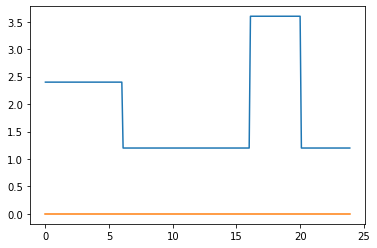

In [22]:
import matplotlib.pyplot as plt
base_tariff = 1.2
x = np.arange(0, 24, 0.1)   # start,stop,step
y = price_coef_func(1.2, x)
y2 = np.zeros(x.shape)


plt.plot(x,y)
plt.plot(x,y2)

In [23]:
def generate_sentences(n_sentences = 300, max_n_words = 10):
    # функция перевода в 36ричную систему (26 букв англ алфавита + 10 цифр)
    def stringify(n, base=36):
        return np.base_repr(n, base=base)
    # Векторизированая 
    stringificate = np.vectorize(stringify)

    res = pd.Series(["" for _ in range(n_sentences)])

    # маска, что бы обнулять слова
    p_zero_mask = np.random.uniform(0, 1, max_n_words)

    # цикл: генерируем число из какого-то ужасного распределения -> переводим в строку в 36ичной системе ->
    # -> обнуляем с какой-то вероятностью и записываем в предложение
    for i in range(p_zero_mask.shape[0]):
        x = pd.Series(
            stringificate(
                np.abs(
                    (
                        scipy.stats.gilbrat(loc=0.00, scale=1/100)
                        .rvs(size=n_sentences)
                    )
                    * np.random.randint(36 ** 2, 36 ** 11, n_sentences)
                ).astype('int'),
                36,
            )
        )
        empty_mask = np.random.choice(
            np.arange(x.shape[0]), size=int(p_zero_mask[i] * x.shape[0])
        )
        x.iloc[empty_mask] = ""
        res += " "
        res += x
    # удаляем повторяющиеся пробелы
    res = res.replace("\s+", " ", regex=True)
    # удаляем цифры и делаем нижний регистр
    res = res.replace("[\d\.]", "", regex=True).str.lower()

    return res.values.flatten()

In [24]:
def generate_feedback(rides, n_points=300):
    ids = np.arange(n_points) + 10000

    assert n_points<=rides.count(), "ACHTUNG"

    ride_ids = rides.select("Id").toPandas().sample(n_points, replace=True).reset_index(drop=True)

    # feedback id
    # ride id
    # feedback type (0 -negative,1 - pos)
    # category type  (service, comfort, speed)
    # text_field (random string)

    feedback_types = np.random.choice([False,True], n_points) #50/50
    category_types = np.random.choice(["service", "comfort", "speed", "waiting"], n_points)
    ride_comments = generate_sentences(n_points, np.random.poisson(20))

    feedback_df = pd.DataFrame({
            "Id": ids,
            "RideId":ride_ids.values.flatten(),
            "FeedbackType": feedback_types,
            "CategoryType": category_types,
            "Comment": ride_comments,
        }
    )
      

    df = spark.createDataFrame(
        feedback_df,
        schema="Id bigint, RideId bigint, FeedbackType boolean, CategoryType string, Comment string",
    )
    return df

In [25]:
feed_df = generate_feedback(lab_data, 10000)

In [26]:
feed_df.show()

+-----+------+------------+------------+--------------------+
|   Id|RideId|FeedbackType|CategoryType|             Comment|
+-----+------+------------+------------+--------------------+
|10000| 18299|        true|       speed| zhphyz muipgwz z...|
|10001| 50137|       false|       speed| zhutcf muusonb b...|
|10002| 19130|        true|     waiting| lujw rlbhqrii az...|
|10003| 28661|        true|     comfort| borqvv safe qwsr...|
|10004| 52145|       false|     waiting| rvlee klujsp hot...|
|10005| 38000|       false|     waiting| sqnuvtph dwtcx b...|
|10006| 49322|       false|       speed| xcvdtidm aigwam ...|
|10007| 61171|       false|     comfort| gdqagrw catgoj b...|
|10008| 78704|       false|     comfort| pwhxfp pputrk rq...|
|10009| 63270|       false|       speed| xcnqqb cehbwse c...|
|10010| 67208|        true|     waiting| bluvtlvz dubp uh...|
|10011| 47300|       false|     service| dokpex ixxdmm rk...|
|10012| 22451|       false|       speed| lwfkbkuiz kcjfbh...|
|10013| 

# Варіант 1

## топ 100 водіїв за рейтингом

In [27]:
TOP_N_DRIVERS = 50
var1 = (
    (
        lab_data.groupBy("DriverId")
        .agg(F.avg("DriverRate").alias("Rating"))
    )
    .alias("result")
    .join(
        drivers_dataframe.alias("drivers_meta"),
        lab_data.DriverId == drivers_dataframe.Id
    )
    .select(
        "result.DriverId",
        "drivers_meta.Name",
        "drivers_meta.Surname",
        "drivers_meta.Car",
        "result.Rating"
    ).orderBy(F.desc("Rating")).limit(TOP_N_DRIVERS)
)
var1.show(TOP_N_DRIVERS)


+--------+---------+------------+----+------------------+
|DriverId|     Name|     Surname| Car|            Rating|
+--------+---------+------------+----+------------------+
|    3621| Kathleen|     Cumings|4518| 4.631578947368421|
|    3176|  Richard|    Williams|9468| 4.555555555555555|
|    2010|    Emily|      Crease|9905| 4.538461538461538|
|    3124|    Scott|Chronopoulos|2292| 4.538461538461538|
|    1117|  Jessica|     Devaney|8556|               4.5|
|    3382|  Patrick|      Crease|8852|               4.5|
|    1393|  William|     Hewlett|6608| 4.478260869565218|
|    3260|   Nicole|     Cumings|2089| 4.444444444444445|
|    2984|   Brenda| Saundercock|2710|            4.4375|
|    3529|    Kevin|       Meyer|8317| 4.428571428571429|
|    3974|   Sharon|      Crease|4537| 4.411764705882353|
|    2201|  Matthew|        West|9794| 4.409090909090909|
|    3895|    Kevin|        Cann|8066| 4.409090909090909|
|    1763| Virginia|     Devaney|2907|               4.4|
|    2832|    

# Варіант 2

## кого з водіїв ми маємо зняти з нашої системи ( рейтинг менше 3,5)

In [30]:
TO_SHOW = 20
var2 = (
    lab_data.groupBy("DriverId")
    .agg(F.avg("DriverRate").alias("Rating"))
    .filter(F.col("Rating") < 3.5)
    .alias("result")
    .join(
        drivers_dataframe.alias("drivers_meta"),
        lab_data.DriverId == drivers_dataframe.Id,
    )
    .select(
        "result.DriverId",
        "drivers_meta.Name",
        "drivers_meta.Surname",
        "drivers_meta.Car",
        "result.Rating",
    )
    .orderBy(F.asc("Rating"))
)

var2.show(var2.count(), truncate = False)
var2.count()

+--------+-----------+-------------+----+------------------+
|DriverId|Name       |Surname      |Car |Rating            |
+--------+-----------+-------------+----+------------------+
|3209    |Christine  |Sirayanian   |7456|2.6470588235294117|
|2709    |Stephanie  |ODwyer       |3244|2.75              |
|3844    |Zachary    |Franchi      |6440|2.769230769230769 |
|3351    |Kathleen   |Goodwin      |2474|2.7857142857142856|
|1409    |Judith     |Sloper       |3178|2.8421052631578947|
|3580    |James      |Uruchurtu    |3672|2.857142857142857 |
|3006    |Jeremy     |Meyer        |7534|2.875             |
|1578    |Efrosinia  |Panula       |6610|2.875             |
|3410    |John       |Williams     |9231|2.8823529411764706|
|2675    |Brenda     |Spencer      |5251|2.8823529411764706|
|3315    |Carolyn    |ODriscoll    |2569|2.888888888888889 |
|2663    |Jose       |Harris       |3370|2.888888888888889 |
|3930    |David      |Novel        |1002|2.8947368421052633|
|2333    |Diane      |Me

753

# Варіант 3

## в який проміжок часу здійснюється найбільше поїздок

In [29]:
most_riding = (
    lab_data.withColumn("date", F.to_date("StartTime"))
    .withColumn("TimePeriod", F.date_format("StartTime", "HH:00:00"))
    .groupBy("TimePeriod")
    .count()
    .select("TimePeriod", F.col("count").alias("NumberOfRides"))
    .orderBy(F.desc("NumberOfRides"))
    .limit(1)
)
most_riding.show()


+----------+-------------+
|TimePeriod|NumberOfRides|
+----------+-------------+
|  07:00:00|         4326|
+----------+-------------+



# Варіант 4

## топ 50 клієнтів за рейтингом

In [31]:
TOP_N_USERS = 50
var3 = (
    (
        lab_data.groupBy("UserId")
        .agg(F.avg("UserRate").alias("Rating"))
    )
    .alias("result")
    .join(
        users_dataframe.alias("users_meta"),
        lab_data.UserId == users_dataframe.Id
    )
  .select(
        "result.UserId",
        "users_meta.Name",
        "users_meta.Surname",
        "result.Rating"
    ).orderBy(F.desc("Rating")).limit(TOP_N_USERS)
)
var3.show(TOP_N_USERS)


+------+---------+------------+------+
|UserId|     Name|     Surname|Rating|
+------+---------+------------+------+
| 11227|      Amy|      Turpin|   5.0|
| 12232|    Kelly|   Uruchurtu|   5.0|
| 13001|     Lisa| Abihashvili|   5.0|
| 10028|  Cynthia| Saundercock|   5.0|
| 10316|  Volodya|     Beesley|   5.0|
| 12448|  Carolyn| Saundercock|   5.0|
| 10565|  Kenneth|        Rice|   5.0|
| 10848|  Patrick|   Sandstrom|   5.0|
| 11352|    Maria|      Rogers|   5.0|
| 12932|    Helen|   Holverson|   5.0|
| 12691| Nicholas|      Harris|   5.0|
| 11934|   Ronald|      Kraeff|   5.0|
| 10101|      Amy|       Allen|   5.0|
| 12937| Patricia|        Rice|   5.0|
| 10767|  Brandon|      Lennon|   5.0|
| 13015| Virginia|   Heikkinen|   5.0|
| 11096|    Karen|     Woolner|   5.0|
| 10159|   Justin|     Hewlett|   5.0|
| 10792|     Adam|     Bonnell|   5.0|
| 12590|    Jason|      Panula|   5.0|
| 12987|     Joan|    Williams|   5.0|
| 10127|   Lauren|       Meyer|   5.0|
| 12179|   Martha|       

# Варіант 5

## топ 100 водів, що заробили найбільше

In [32]:
TOP_N_EARNERS = 10
var5 = (
    (
        lab_data.groupBy("DriverId")
        .agg(F.sum("Price").alias("Total"))
        .orderBy(F.desc("Total"))
    )
    .alias("result")
    .join(
        drivers_dataframe.alias("drivers_meta"),
        lab_data.DriverId == drivers_dataframe.Id
    )
    .select(
        "result.DriverId",
        "drivers_meta.Name",
        "drivers_meta.Surname",
        "drivers_meta.Car",
        "result.Total"
    )
    .limit(TOP_N_EARNERS)
)
var5.show(TOP_N_EARNERS)


+--------+---------+--------+----+------+
|DriverId|     Name| Surname| Car| Total|
+--------+---------+--------+----+------+
|    1677|  Patrick| Vestrom|9153|3081.2|
|    1697|   Donald|   Moran|7394|2954.0|
|    1806|    Masha| Stewart|9812|2339.6|
|    1950|    David|Futrelle|5433|2270.4|
|    1010| Nicholas|  Crease|7274|3248.0|
|    1224|  Zachary|    Hood|3868|2868.4|
|    1258|    Karen|  Nasser|6794|2770.0|
|    1277|     John|  Jenkin|7044|2830.8|
|    1360|    Linda| Spencer|6395|2268.8|
|    1840|Alexander|   Novel|9235|2414.8|
+--------+---------+--------+----+------+



# Варіант 6

## топ 50 - водіїв, які переважно їздять вночі

In [33]:
from pyspark.sql.types import IntegerType
most_riding = (
    lab_data.withColumn("date", F.to_date("StartTime"))
    .withColumn("Hour", F.substring("StartTime", 12, 2).cast(IntegerType()))
    .filter(F.col("Hour") <=6)
    .groupBy("DriverId")
    .count()
    .orderBy(F.desc("count"))
    .alias("driver_count")
    .join(
        drivers_dataframe.alias("drivers_meta"),
        lab_data.DriverId == drivers_dataframe.Id
    )
  .select(
        "driver_count.DriverId",
        "drivers_meta.Name",
        "drivers_meta.Surname",
        "driver_count.count"
    ).orderBy(F.desc("count")).limit(TO_SHOW)   
    
).show()

+--------+-------+-------------+-----+
|DriverId|   Name|      Surname|count|
+--------+-------+-------------+-----+
|    1377|  Debra|        Mamee|   23|
|    2312|Heather|       Panula|   23|
|    1434|Douglas|Vander Planke|   21|
|    1274| Andrea|      Woolner|   21|
|    3274|   Joan|      Fortune|   21|
|    1460|Cynthia|        Glynn|   20|
|    1446|  Debra|         West|   20|
|    3417|Anthony|      Morozov|   20|
|    2817|  Brian|       Lennon|   20|
|    2274|  Larry|  Abihashvili|   20|
|    1986| Edward|       Samaan|   19|
|    1975| Gerald|        Mamee|   19|
|    1466| Olivia|       Harper|   19|
|    1301|Heather|       Crease|   19|
|    1863|  Scott|      Cumings|   19|
|    1892|  Carol|       Harper|   19|
|    3779|Cynthia|      Goodwin|   19|
|    3428|  Henry|       Harper|   19|
|    3448|  Debra|     McCarthy|   19|
|    3413|  Brian|       Samaan|   19|
+--------+-------+-------------+-----+



# Варіант 7

## за що (яка категорія) найчастіше водіїв хвалять

In [34]:
feed_df.filter(F.col("FeedbackType") == True).groupBy("CategoryType").count().orderBy(F.desc("count")).limit(1).show()

+------------+-----+
|CategoryType|count|
+------------+-----+
|     service| 1284|
+------------+-----+



# Варіант 8

## на що (найчастіше) скаржаться клієнти (категорія)

In [35]:
feed_df.filter(F.col("FeedbackType") == False).groupBy("CategoryType").count().orderBy(F.desc("count")).limit(1).show()

+------------+-----+
|CategoryType|count|
+------------+-----+
|       speed| 1319|
+------------+-----+



In [36]:
lab_data.printSchema()

root
 |-- Id: long (nullable = true)
 |-- DriverId: long (nullable = true)
 |-- UserId: long (nullable = true)
 |-- SLat: double (nullable = true)
 |-- SLong: double (nullable = true)
 |-- ELat: double (nullable = true)
 |-- ELong: double (nullable = true)
 |-- StartTime: timestamp (nullable = true)
 |-- EndTime: timestamp (nullable = true)
 |-- Duration: double (nullable = true)
 |-- Price: double (nullable = true)
 |-- DriverRate: long (nullable = true)
 |-- UserRate: long (nullable = true)



# Варіант 9

## Топ 10 найдовших текстових коментарів

In [37]:
feed_df.printSchema()

root
 |-- Id: long (nullable = true)
 |-- RideId: long (nullable = true)
 |-- FeedbackType: boolean (nullable = true)
 |-- CategoryType: string (nullable = true)
 |-- Comment: string (nullable = true)



In [40]:
TO_SHOW_COMMENTS = 10
var9 = feed_df.select("RideId", "FeedbackType", "CategoryType", "Comment", F.length("Comment").alias("length")).alias("top_comments").join(
    lab_data.alias("lab_data"), lab_data.Id == feed_df.RideId
).select(
    "lab_data.Id",
    "lab_data.DriverId",
    "lab_data.UserId",
    "top_comments.FeedbackType",
    "top_comments.CategoryType",
    "top_comments.Comment",
    "top_comments.length",
    "lab_data.Duration",
    "lab_data.Price",
    "lab_data.DriverRate",

).orderBy(
    F.desc("length")
)
var9.show()

+------+--------+------+------------+------------+--------------------+------+------------------+------------------+----------+
|    Id|DriverId|UserId|FeedbackType|CategoryType|             Comment|length|          Duration|             Price|DriverRate|
+------+--------+------+------------+------------+--------------------+------+------------------+------------------+----------+
| 90497|    1293| 15634|       false|     comfort| qlyratbb cijbipj...|   136|              20.0|              98.0|         4|
| 76990|    1626| 14091|        true|     service| hzvfkjm ozybwhsi...|   135|              11.0|              63.2|      null|
| 26559|    2253| 11227|        true|     comfort| kiktjaak bthmpiu...|   133|              20.0|              98.0|         2|
| 54121|    1725| 13850|        true|     service| hvrwudvie gdhcrh...|   131|17.000000000000004|              70.4|      null|
| 99903|    2677| 10055|        true|     waiting| iaryfdfr byxcvqc...|   131|              18.0| 93.199

In [41]:
# bez join
feed_df.select("Comment", F.length("Comment").alias("length")).orderBy(F.desc("length")).limit(TO_SHOW_COMMENTS).toPandas()

,Comment,length
0,qlyratbb cijbipjpn xdvrhvmp nwuptabwc amdrhlc...,136
1,hzvfkjm ozybwhsi cgakupad zvwdwfwp lyjnh umii...,135
2,kiktjaak bthmpiuu vujawelyk vmlvqnblyk ehvxmr...,133
3,iaryfdfr byxcvqcg ejxblnzs tihkrtgdr djwmt ok...,131
4,hvrwudvie gdhcrhmx zdpcfzk vnwiol igylzayt fa...,131
5,evnlspa iermzpcw mvhgxkl lgvtqrkdi fwyehchskl...,130
6,frrrm gmthykkrx zytxcjcu cjddgjqjh dnlanll yk...,129
7,zsmipkia aaxxxfhheg xrcahkp dvnvnm hiwsgpc tf...,127
8,bilwmhra aqihwrhky fvprpmo ctsyoogcm jzrlp ho...,127
9,bzwwgsb nnyalh deqqgmwsfv conqxjsn zjccsa dae...,126
